In [1]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from matplotlib import pyplot as plt

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
n_of_calsses= 10
model_path='mnist_model.h5'

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
X_train=X_train.reshape(len(X_train),784)
X_test=X_test.reshape(len(X_test),784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
y_train_one_hot=tensorflow.keras.utils.to_categorical(y_train,n_of_calsses)
y_test_one_hot=tensorflow.keras.utils.to_categorical(y_test,n_of_calsses)

In [6]:
model= Sequential()
model.add(Dense(512,activation='relu',bias_initializer=tensorflow.keras.initializers.Constant(value=0.1),input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu',bias_initializer=tensorflow.keras.initializers.Constant(value=0.1)))
model.add(Dropout(0.2))
model.add(Dense(n_of_calsses,activation='softmax',bias_initializer=tensorflow.keras.initializers.Constant(value=0.1)))


In [7]:
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
history=model.fit(X_train,y_train_one_hot,shuffle=True,epochs=1500,validation_split=0.15,verbose=1,callbacks=
                  [EarlyStopping(monitor='val_loss',min_delta=0,patience=10,verbose=0,mode='min'),
                   ModelCheckpoint(model_path,monitor='val_loss',save_best_only=True,mode='min',verbose=0)])

Train on 51000 samples, validate on 9000 samples
Epoch 1/1500
51000/51000 [==============================] - 12s 227us/sample - loss: 0.2293 - accuracy: 0.9292 - val_loss: 0.1050 - val_accuracy: 0.9682
Epoch 2/1500
51000/51000 [==============================] - 9s 177us/sample - loss: 0.1096 - accuracy: 0.9656 - val_loss: 0.1232 - val_accuracy: 0.9650
Epoch 3/1500
51000/51000 [==============================] - 10s 189us/sample - loss: 0.0828 - accuracy: 0.9744 - val_loss: 0.0772 - val_accuracy: 0.9783
Epoch 4/1500
51000/51000 [==============================] - 9s 173us/sample - loss: 0.0674 - accuracy: 0.9786 - val_loss: 0.0836 - val_accuracy: 0.9750
Epoch 5/1500
51000/51000 [==============================] - 9s 173us/sample - loss: 0.0579 - accuracy: 0.9818 - val_loss: 0.0929 - val_accuracy: 0.9742
Epoch 6/1500
51000/51000 [==============================] - 9s 168us/sample - loss: 0.0511 - accuracy: 0.9835 - val_loss: 0.0863 - val_accuracy: 0.9770
Epoch 7/1500
51000/51000 [===========

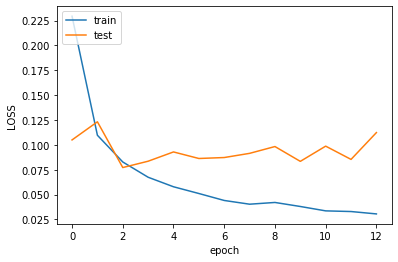

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('LOSS')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
estimator = load_model(model_path)
test_input = np.array([X_test[1]])
prediction=np.argmax(estimator.predict(test_input))
print("Prediction: ", prediction)
print("Ground Truth: ", y_test_one_hot[1])

Prediction:  2
Ground Truth:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
estimator.summary()
score=estimator.evaluate(X_test,y_test_one_hot)
print('Accuracy: ',score[1]*100.0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
10000/1 [===========================================================================================================

Accuracy:  97.57999777793884
